# CARDIOCULATOR

In [1]:
# # pip install --upgrade dask-cudf

# # Install RAPIDS (dask-cudf dependency)
# !pip install -U rapidsai -f https://repo.rapids.ai/nvidia

# # Install dask-cudf
# !pip install dask-cudf


In [2]:
!pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/eb/43/ec8d59a663e0a1a67196b404ec38ccb0051708bad74a48c80d96c61dd0e5/pycaret-3.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/65.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/65.9 MB 1.4 MB/s eta 0:00:49
     --------------------------------------- 0.1/65.9 MB 880.9 kB/s eta 0:01:15
     --------------------------------------- 0.1/65.9 MB 731.4 kB/s eta 0:01:31
     --------------------------------------- 0.1/65.9 MB 654.9 kB/s eta 0:01:41
     --------------------------------------- 0.2/65.9 MB 656.4 kB/s eta 0:01:41
     -----------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [3]:
from pycaret.classification import *

Cardiovascular diseases define a group of diseases that affect the heart and blood vessels. This group includes various types of diseases such as heart attack, stroke, heart failure, and arrhythmia. Cardiovascular diseases are among the most common causes of death worldwide and generally emerge due to lifestyle factors (smoking, alcohol, insufficient physical activity, etc.) and genetic predispositions.

According to the World Health Organization's data from 2019, **ischemic heart disease** stands at the forefront of the top 10 diseases causing death today and is held responsible for approximately 16% of deaths. Such a high rate being attributed to a single disease is quite a tragic situation. However, since many risk factors for cardiovascular diseases are preventable, it is essential for individuals and societies to be informed and proactive in reducing these risks.

In this context, a machine learning model that can predict disease risk with cardiovascular medical data could be a significant step for public health. This model can assist individuals in better understanding their health conditions and taking necessary precautions.

**ABOUT DATASET**

The columns and their descriptions of our dataset, which consists of 70,000 observation units, are as follows:

* *id*      -> Unique identifier for each person
* *age*     -> Age (day)   
* *gender*  -> Gender       
* *height*  -> Height (cm)     
* *weight*  -> Weight (kg)    
* *ap_hi*   -> Systolic blood pressure (mm Hg)     
* *ap_lo*   -> Diastolic blood pressure (mm Hg)
* *cholesterol*  -> Cholesterol level in the blood (total)
* *gluc*    -> Blood glucose level        
* *smoke*   -> Smoking status       
* *alco*    -> Alcohol consumption status      
* *active*  -> Physical activity   
* *cardio*  -> Presence/Absence of cardiovascular disease -> **Target**

<a id='section_1'></a>
### Data Introduction and Exploration

In [4]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------------------------- ------------- 30.7/47.0 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.0 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.1/101.0 MB 1.4 MB/s eta 0:01:10
   ---------------------------------------- 0.3/101.0 MB 2.0 MB/s eta 0:00:52
   ---------------------------------------- 0.4/101.0 MB 2.3 MB/s eta 0:00:44
   ---------------------------------------- 0.5/101.0 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.8/101.0 MB 3.0 MB/s eta 0:00:34
   ----------------

We will start with the necessary library imports and adjustments.

In [12]:
# !pip install termcolor
# !pip install missingno
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:31
   ---------------------------------------- 0.2/99.8 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.4/99.8 MB 2.1 MB/s eta 0:00:47
   ---------------------------------------- 0.6/99.8 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.9/99.8 MB 3.1 MB/s eta 0:00:32
   ---------------------------------------- 0.9/99.8 MB 3.0 MB/s eta 0:00:33
   ---------------------------------------- 1.1/99.8 MB 2.9 MB/s eta 0:00:34
   ---------------------------------------- 1.1/99.8 MB 2.9 MB/s eta 0:00:34
    ----------------------------

In [1]:
import numpy as np
import pandas as pd
import joblib
from termcolor import colored
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

#----------------------------------------------#

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, confusion_matrix, classification_report, RocCurveDisplay

#----------------------------------------------#

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 300)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [12]:
df_real = pd.read_csv("cardio_train.csv", sep=';')

To protect the original data, provide a fallback in case of errors, and assess the impact of changes, we will create a copy of the dataframe and work on that copy.

In [13]:
df = df_real.copy()

First, let's take a look at the dataframe.

In [14]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
0   0  18393       2     168  62.000    110     80            1     1      0     0       1       0
1   1  20228       1     156  85.000    140     90            3     1      0     0       1       1
2   2  18857       1     165  64.000    130     70            3     1      0     0       0       1
3   3  17623       2     169  82.000    150    100            1     1      0     0       1       1
4   4  17474       1     156  56.000    100     60            1     1      0     0       0       0

In [15]:
TARGET = "cardio"
# Our target variable is "cardio"

When we look at the dataset, the first thing we notice is that the data in the age variable is based on days. Therefore, we will make corrections first.

In [16]:
df["age"] = df["age"].map(lambda x: x // 365)

In [17]:
df["age"].head(10)

0    50
1    55
2    51
3    48
4    47
5    60
6    60
7    61
8    48
9    54
Name: age, dtype: int64

In the gender column, the values are currently set to 1 and 2, but to optimize computations for the machine learning model, we will convert them to 0 and 1. To understand which category represents which gender, let's examine the dataset based on gender.

In [18]:
df.groupby("gender").mean()

id    age  height  weight   ap_hi   ap_lo  cholesterol  gluc  smoke  alco  active  cardio
gender                                                                                                 
1      49898.345 52.954 161.356  72.566 128.139  94.523        1.385 1.235  0.018 0.025   0.802   0.497
2      50110.247 52.629 169.948  77.257 130.079 100.552        1.334 1.210  0.219 0.106   0.807   0.505

As seen, the age averages are equal; in this case, we can say that the category with higher averages in height and weight represents males.

In [19]:
df['gender'] = df['gender'].replace({2: "male", 1: "female"})

In [11]:
df.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
0   0   50    male     168  62.000    110     80            1     1      0     0       1       0
1   1   55  female     156  85.000    140     90            3     1      0     0       1       1
2   2   51  female     165  64.000    130     70            3     1      0     0       0       1
3   3   48    male     169  82.000    150    100            1     1      0     0       1       1
4   4   47  female     156  56.000    100     60            1     1      0     0       0       0

In [27]:
def check_df(dataframe):
    print("---------- SHAPE ----------")
    print(dataframe.shape)
    print("---------- TYPES ----------")
    print(dataframe.dtypes)
    print("---------- NA VALUES ----------")
    print(dataframe.isnull().sum())

In [28]:
check_df(df)

---------- SHAPE ----------
(70000, 13)
---------- TYPES ----------
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object
---------- NA VALUES ----------
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [29]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]


    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

#### About function :

 * It gives the names of categorical, numerical, and categorical but cardinal variables in the data set.

Note: Categorical variables with numerical appearance are also included in categorical variables.

 Parameters :

 ***cat_th*** (int) : Optional threshold value for variables that appear numeric but are categorical

 ***car_th*** (int) : Optional threshold value for categorical but cardinal variables

Note : cat_cols + num_cols + cat_but_car = total number of variables

Note : num_but_cat is inside cat_cols


In [30]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(f"\n{colored('Numerical Columns:','blue', attrs=['reverse'])} {num_cols}\n\n\n{colored('Categorical Columns:','magenta', attrs=['reverse'])} {cat_cols}\n\n\n"
        f"{colored('Cardinal Columns:','cyan', attrs=['reverse'])}{cat_but_car}\n")

Observations: 70000
Variables: 13
cat_cols: 7
num_cols: 6
cat_but_car: 0
num_but_cat: 7

Numerical Columns: ['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']


Categorical Columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


Cardinal Columns:[]



In [31]:
# For analysis of categorical variables :

def cat_summary(dataframe, col_name, plot=False):
    display(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [32]:

for col in cat_cols:
    cat_summary(df, col)

gender  Ratio
1   45530 65.043
0   24470 34.957

cholesterol  Ratio
1        52385 74.836
2         9549 13.641
3         8066 11.523

gluc  Ratio
1  59479 84.970
3   5331  7.616
2   5190  7.414

smoke  Ratio
0  63831 91.187
1   6169  8.813

alco  Ratio
0  66236 94.623
1   3764  5.377

active  Ratio
1   56261 80.373
0   13739 19.627

cardio  Ratio
0   35021 50.030
1   34979 49.970

* Based on our observations, we can infer that there is an imbalance in the variables related to 'smoking', 'alcohol', and 'activity' in the dataset. Therefore, the values in these variables may not be very reliable for this study.

* One point to note is that the values in the glucose and cholesterol variables in the dataset are categorized as 1, 2, and 3. Based on our domain knowledge, we can say that 1 represents normal values, 2 represents values slightly outside the normal range, and 3 represents values that are considered abnormal.


#### Result----------        A1C Test----------       Fasting Blood Sugar Test

  **Diabetes**-------> 6.5% or above---------    126 mg/dL or above ----- **category 3**
  
  **Prediabetes**---->  5.7% – 6.4%-----------      100 – 125 mg/dL-------- **category 2**
  
  **Normal**--------->       Below 5.7%------------      99 mg/dL or below----- **category 1**
  
  
#### Result ............     Fasting Blood Sugar Test

  **Low** ...........................     <200 mg/dl ------- **category 3**
  
  **Borderline High** .....  200-239 mg/dl --- **category 2**
  
  **High** ............................  >240 mg/dl ------ **category 1**
  
 * In our dataset, it's quite advantageous that the distribution of our target variable is homogeneous. However, we can say that the distribution of the gender variable is not as balanced.

In [33]:
df['gender'] = df['gender'].replace({'male': 0, 'female': 1})

In [34]:
# For analysis of numerical variables :

def num_summary(dataframe, numerical_col, plot=False):
    if plot:
        dataframe[numerical_col].hist(bins=200)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

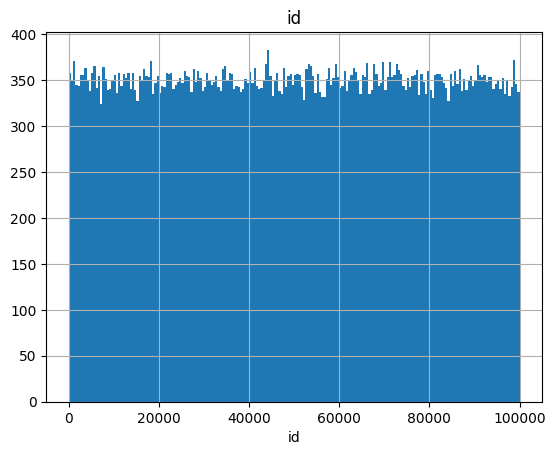

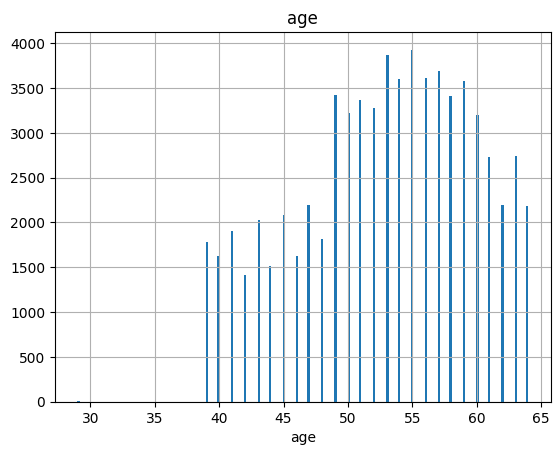

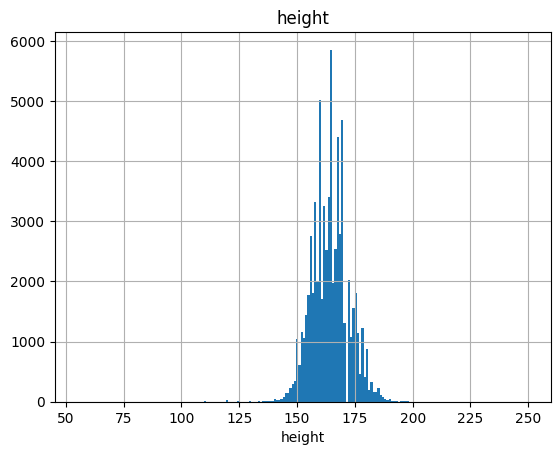

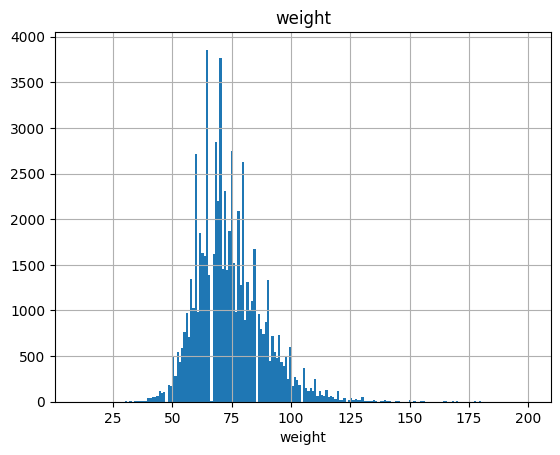

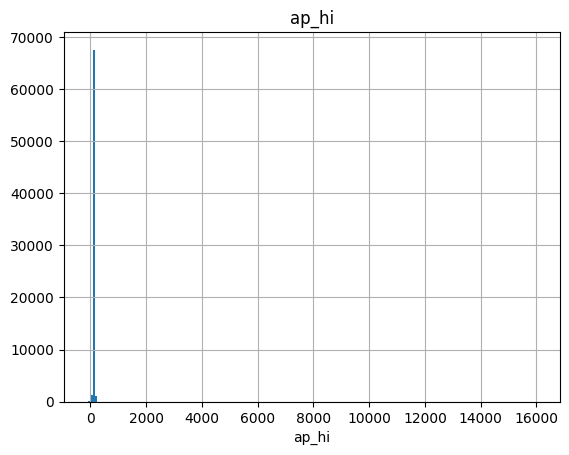

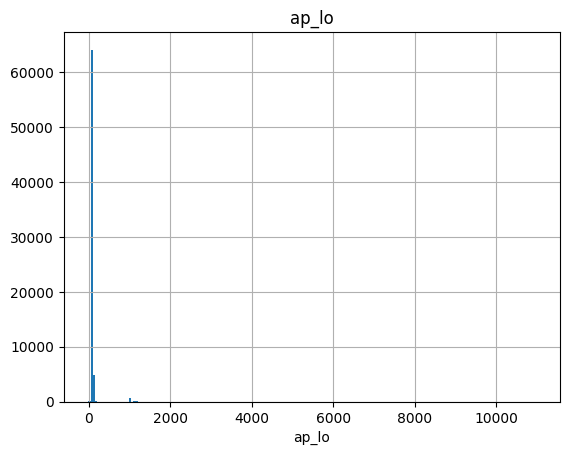

In [35]:
for col in num_cols:
    num_summary(df, col, True)

In [36]:
# Analysis of Categorical Variables on the Target Variable:

def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_Mean": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [37]:
for col in cat_cols:
    target_summary_with_cat(df,TARGET,col)

        TARGET_Mean
gender             
0             0.505
1             0.497


             TARGET_Mean
cholesterol             
1                  0.440
2                  0.602
3                  0.765


      TARGET_Mean
gluc             
1           0.481
2           0.593
3           0.622


       TARGET_Mean
smoke             
0            0.502
1            0.475


      TARGET_Mean
alco             
0           0.501
1           0.484


        TARGET_Mean
active             
0             0.536
1             0.491


        TARGET_Mean
cardio             
0             0.000
1             1.000




In [38]:
# Analysis of Numerical Variables on the Target Variable:

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [39]:
for col in num_cols:
    target_summary_with_num(df, TARGET, col)

              id
cardio          
0      49862.869
1      50082.102


          age
cardio       
0      51.231
1      54.452


        height
cardio        
0      164.448
1      164.270


        weight
cardio        
0       71.592
1       76.822


         ap_hi
cardio        
0      120.433
1      137.212


         ap_lo
cardio        
0       84.252
1      109.024




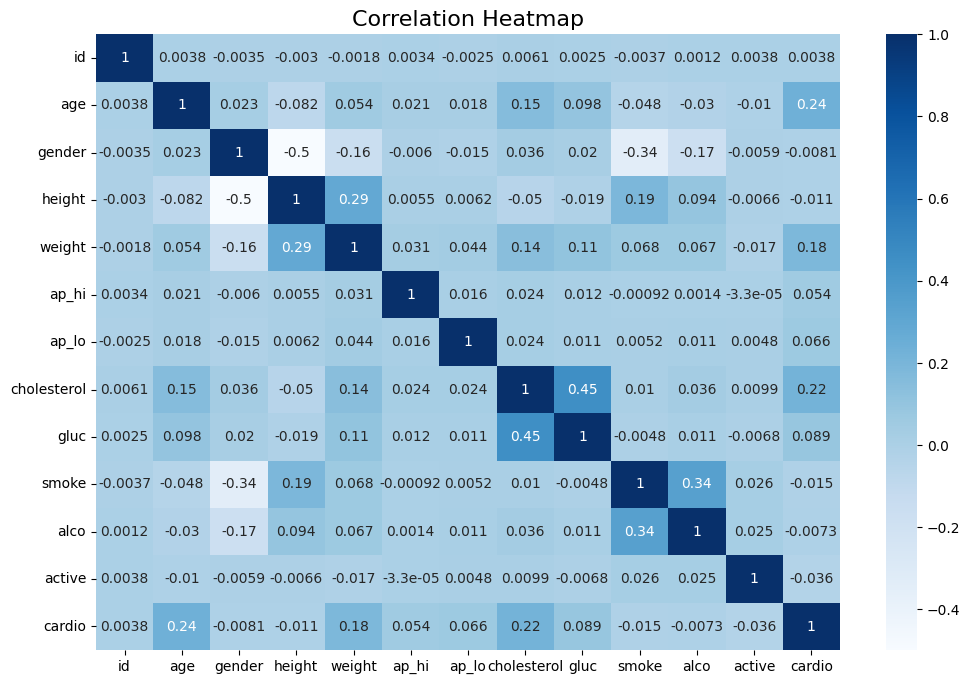

In [40]:
cor = df.corr()
plt.figure(figsize=(12, 8))
cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
sns.heatmap(cor, cmap="Blues", annot=True)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<a id='section_2'></a>
### Exploratory Data Analysis(EDA) with Pandas-Profiling

In [38]:
!pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/5a/14/a19d2266adf443d441be74d65e4ac12ba252c806ccf7ffdb59c7443bd846/ydata_profiling-4.6.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/d7/10/ddfb9539a6e55f7dfd6c2b9b81d86fcba2761ba87eeb81f8b1012957dcdc/pydantic-2.5.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/174.6 kB ? eta -:--:--
     -------- ---------------------------- 41.0/174.6 kB 991.0 kB/s eta 0:00:01
     -------------------------- ----------- 122.9/174.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  174.1/174.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 174.6/174.6 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/102.7 kB ? eta -:--:--
     -------------------------------------- 102.7/102.7 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py)

In [39]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile
# profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
df.describe().T

count      mean       std      min       25%       50%       75%       max
id          70000.000 49972.420 28851.302    0.000 25006.750 50001.500 74889.250 99999.000
age         70000.000    52.841     6.767   29.000    48.000    53.000    58.000    64.000
gender      70000.000     0.650     0.477    0.000     0.000     1.000     1.000     1.000
height      70000.000   164.359     8.210   55.000   159.000   165.000   170.000   250.000
weight      70000.000    74.206    14.396   10.000    65.000    72.000    82.000   200.000
ap_hi       70000.000   128.817   154.011 -150.000   120.000   120.000   140.000 16020.000
ap_lo       70000.000    96.630   188.473  -70.000    80.000    80.000    90.000 11000.000
cholesterol 70000.000     1.367     0.680    1.000     1.000     1.000     2.000     3.000
gluc        70000.000     1.226     0.572    1.000     1.000     1.000     1.000     3.000
smoke       70000.000     0.088     0.283    0.000     0.000     0.000     0.000     1.000
alco        70000.000     0.054     0.226    0.000     0.000     0.000     0.000     1.000
active      70000.000     0.804     0.397    0.000     1.000     1.000     1.000     1.000
cardio      70000.000     0.500     0.500    0.000     0.000     0.000     1.000     1.000

Based on the statistical information above, we can say that there are some imbalances and outliers in the dataset. From this point on, medical domain knowledge will be used to make adjustments to the values in the dataset.

<a id='section_3'></a>
### Feature Engineering for Outliers

In [41]:
df[df["ap_hi"]<0]

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
4607    6525   41       1     165  78.000   -100     80            2     1      0     0       1       0
16021  22881   60       0     161  90.000   -115     70            1     1      0     0       1       0
20536  29313   42       1     153  54.000   -100     70            1     1      0     0       1       0
23988  34295   50       1     162  74.000   -140     90            1     1      0     0       1       1
25240  36025   40       0     168  50.000   -120     80            2     1      0     0       0       1
35040  50055   63       0     168  59.000   -150     80            1     1      0     0       1       1
46627  66571   64       0     160  59.000   -120     80            1     1      0     0       0       0

Blood pressure values can never be negative. When we look at the values, we see that they are numerically correct, but due to the negative signs in front of them, they become outliers; therefore, these values will be converted to positive.

In [42]:
df["ap_hi"]=df["ap_hi"].abs()

In [43]:
df[df["ap_lo"]<0]

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
60106  85816   61       1     167  74.000     15    -70            1     1      0     0       1       1

In [44]:
df["ap_lo"]=df["ap_lo"].abs()

In [45]:
df[df["ap_hi"]<25].head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
567    815   58       1     168  78.000     14     90            2     1      0     0       1       1
927   1294   59       0     175  70.000     14     90            3     1      0     0       1       1
979   1360   49       1     172  65.000     11     80            1     3      0     0       1       0
1600  2260   52       1     165  66.000     12     80            1     1      0     0       1       0
1627  2301   61       1     165  71.000     14     80            1     1      0     0       1       1

Blood pressure values are expressed in mm Hg during medical evaluations, so they are typically represented as 120/80 rather than 12/8. Considering this, I have observed that systolic blood pressure values in the dataset can be found as less than 25 when they are actually below 250 mm Hg. Hence, I've decided to standardize these values.

In [46]:
df['ap_hi'] = df['ap_hi'].apply(lambda x: x*10 if x < 25 else x)

In [47]:
df[df["ap_hi"]<25].head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
8757   12494   46       0     163  63.000     10   2088            1     1      1     0       1       0
42334  60477   51       1     171  80.000     10   1088            1     1      0     0       1       1

After correcting the values and checking again, we find that in 2 observation units, the systolic blood pressure value remains at 10 mm Hg. At this point, I believe it's more appropriate to remove these observation units.

In [48]:
df.drop(df[df["ap_hi"]<25].index, inplace = True)

In [49]:
df[df["ap_lo"]<15].head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
2014    2845   62       0     167  59.000    906      0            1     1      0     0       1       0
6737    9610   45       1     156  61.000    150     10            1     1      0     0       0       1
7598   10843   40       0      70  72.000    120      8            1     1      0     0       1       0
9777   13943   59       1     166 125.000    120      8            3     1      0     0       1       1
10106  14410   50       1     152  50.000    150     10            3     1      0     0       1       1

We will perform the same procedures for the diastolic blood pressure as well.

In [50]:
df['ap_lo'] = df['ap_lo'].apply(lambda x: x*10 if x < 15 else x)

In [51]:
df[df["ap_lo"]<15]

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
2014    2845   62       0     167  59.000    906      0            1     1      0     0       1       0
13489  19258   41       0     150  60.000    130      0            1     1      0     0       0       0
16459  23512   56       1     156  50.000    138      0            3     1      0     0       1       1
17381  24837   49       1     164  78.000    138      0            1     1      0     0       1       0
22923  32749   58       0     166  68.000    149      0            1     1      0     0       1       1
23867  34120   44       1     161  92.000    906      0            2     1      0     0       1       1
25454  36325   49       0     176  73.000    120      0            1     1      0     0       1       0
27686  39577   64       0     180  73.000    140      0            1     1      1     1       1       1
31783  45400   44       1     170  64.000    907      0            1     1      0     0       1       0
35140  50210   57       1     146  55.000    130     10            1     1      0     0       0       0
38370  54780   63       0     170  81.000    148      0            1     1      0     0       1       0
40330  57646   55       1     162  50.000    309      0            1     1      0     0       1       0
41505  59301   57       1     154  41.000    806      0            1     1      0     0       1       0
42397  60565   49       0     176  69.000    906      0            1     1      0     0       1       0
43922  62754   51       1     164  78.000    108      0            2     1      0     0       1       0
45835  65470   53       0     165  70.000    140      0            3     1      1     0       1       0
48049  68612   52       1     160  84.000    121      0            1     1      0     0       0       1
52580  75007   60       1     155  66.000    130      0            1     1      0     0       1       0
56950  81298   41       1     164  70.000    120      0            1     1      0     0       1       0
63787  91073   40       0     161  61.000    117      0            1     1      0     0       1       0
65303  93224   64       0     176  99.000    120      0            1     3      0     0       1       1
68663  98095   49       1     156  41.000    906      0            1     1      0     0       1       0

We will also delete the observations with a diastolic blood pressure value of 0.

In [52]:
df.drop(df[df["ap_lo"]<15].index, inplace = True)

Now, for these two blood pressure values, I will set a lower and upper threshold based on my domain knowledge. I will delete the observations that have values below and above these thresholds. For systolic blood pressure, these values will be 80 and 250, and for diastolic blood pressure, these values will be 50 and 150. The adjustments according to this are as follows.

In [53]:
df.drop(df[df["ap_lo"]<50].index, inplace = True)

In [54]:
df.drop(df[df['ap_lo'] > 150].index, inplace = True)

In [55]:
df.drop(df[df['ap_hi'] > 250].index, inplace = True)

In [56]:
df.drop(df[df['ap_hi'] < 80].index, inplace = True)

Technically, systolic blood pressure should always be higher than diastolic blood pressure; any records indicating otherwise in the dataset are likely errors, for these observation units, a conversion will be made between systolic and diastolic blood pressure values.

In [57]:
df[df["ap_hi"]<df["ap_lo"]].head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
474    681   52       1     156  65.000    120    150            2     1      0     0       1       0
2384  3356   64       1     154 102.000     90    150            1     1      0     0       0       1
2990  4214   60       0     182  90.000     80    140            3     3      0     0       1       1
3447  4880   54       0     180  80.000     80    125            3     3      1     1       1       1
3623  5130   59       1     160  83.000     80    120            1     1      0     0       1       0

In [58]:
condition = df["ap_hi"]<df["ap_lo"]
df.loc[condition, ["ap_hi", "ap_lo"]] = df.loc[condition, ["ap_lo", "ap_hi"]].values

After this stage, we will examine the values in other variables and make changes. For now, it seems our adjustments related to blood pressure values are complete.

In [59]:
df[df["ap_hi"]==df["ap_lo"]].head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
12785  18238   43       0     178 105.000    100    100            1     1      0     0       0       1
32190  45975   63       1     162 120.000    100    100            1     1      0     0       1       0

In [60]:
df.drop(df[df["ap_hi"]==df["ap_lo"]].index, inplace = True)

In [61]:
df.describe().T

count      mean       std    min       25%       50%       75%       max
id          68910.000 49971.191 28848.921  0.000 25000.500 50007.500 74869.750 99999.000
age         68910.000    52.827     6.769 29.000    48.000    53.000    58.000    64.000
gender      68910.000     0.651     0.477  0.000     0.000     1.000     1.000     1.000
height      68910.000   164.361     8.204 55.000   159.000   165.000   170.000   250.000
weight      68910.000    74.119    14.328 11.000    65.000    72.000    82.000   200.000
ap_hi       68910.000   126.674    16.674 80.000   120.000   120.000   140.000   240.000
ap_lo       68910.000    81.319     9.400 50.000    80.000    80.000    90.000   150.000
cholesterol 68910.000     1.364     0.679  1.000     1.000     1.000     1.000     3.000
gluc        68910.000     1.226     0.572  1.000     1.000     1.000     1.000     3.000
smoke       68910.000     0.088     0.283  0.000     0.000     0.000     0.000     1.000
alco        68910.000     0.053     0.225  0.000     0.000     0.000     0.000     1.000
active      68910.000     0.803     0.397  0.000     1.000     1.000     1.000     1.000
cardio      68910.000     0.495     0.500  0.000     0.000     0.000     1.000     1.000

In [62]:
df[df["height"]<140].head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
224    309   59       0      76  55.000    120     80            1     1      0     0       1       0
2412  3399   61       0     138  52.000    140    100            1     1      0     0       1       1
2944  4150   53       1     134  52.000    120     70            1     1      0     0       0       0
3208  4523   50       1     136  57.000    120     80            1     1      0     0       1       0
3420  4838   39       1     100  70.000    100     70            1     1      0     0       1       0

In [63]:
df.drop(df[df['height'] < 140].index, inplace = True)

In [64]:
df[df["weight"]<35].head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio
14722  21040   62       1     143  34.000    100     70            1     1      0     0       1       0
16906  24167   47       0     170  31.000    150     90            2     2      0     0       1       1
18559  26503   49       1     160  30.000    120     80            1     1      0     0       1       1
22016  31439   42       1     146  32.000    100     70            1     1      0     0       0       0
26806  38312   63       1     157  23.000    110     80            1     1      0     0       1       0

In [65]:
df.drop(df[df['weight'] < 35].index, inplace = True)

In [66]:
df.drop(df[df['weight'] > 150].index, inplace = True)

In [67]:
df.drop(df[df['height'] >210].index, inplace = True)

In [68]:
#Let's convert the "weight" variable to an integer type.
df["weight"]=df["weight"].astype(int)

In [69]:
df.describe().T

count      mean       std     min       25%       50%       75%       max
id          68698.000 49972.678 28848.922   0.000 25009.250 50012.500 74867.750 99999.000
age         68698.000    52.829     6.767  29.000    48.000    53.000    58.000    64.000
gender      68698.000     0.651     0.477   0.000     0.000     1.000     1.000     1.000
height      68698.000   164.464     7.798 140.000   159.000   165.000   170.000   207.000
weight      68698.000    74.064    14.069  35.000    65.000    72.000    82.000   150.000
ap_hi       68698.000   126.672    16.663  80.000   120.000   120.000   140.000   240.000
ap_lo       68698.000    81.319     9.392  50.000    80.000    80.000    90.000   150.000
cholesterol 68698.000     1.365     0.679   1.000     1.000     1.000     1.000     3.000
gluc        68698.000     1.226     0.572   1.000     1.000     1.000     1.000     3.000
smoke       68698.000     0.088     0.283   0.000     0.000     0.000     0.000     1.000
alco        68698.000     0.053     0.225   0.000     0.000     0.000     0.000     1.000
active      68698.000     0.803     0.397   0.000     1.000     1.000     1.000     1.000
cardio      68698.000     0.495     0.500   0.000     0.000     0.000     1.000     1.000

When we take a rough look at the min-max, standard deviation values, and averages, we can say that the values we have are currently balanced.

At this point, using the parameters we have, we will generate features for body mass index, body mass index classification, blood pressure value classification, and pulse pressure.

<a id='section_4'></a>
### Feature Extraction

In [70]:
df["bmi"] = df["weight"] *10000 / ((df["height"])**2)

In [71]:
conditions = [
    (df["bmi"] <= 15),                            # 0 - Anorexic
    (df["bmi"] > 15) & (df["bmi"] <= 18.5),       # 1 - Underweight
    (df["bmi"] > 18.5) & (df["bmi"] <= 25),       # 2 - Normal weight
    (df["bmi"] > 25) & (df["bmi"] <= 30),         # 3 - Overweight
    (df["bmi"] > 30) & (df["bmi"] <= 35),         # 4 - Obesity Class I
    (df["bmi"] > 35) & (df["bmi"] <= 40),         # 5 - Obesity Class II
    (df["bmi"] > 40)                              # 6 - Obesity Class III
]

bmi_class = [0, 1, 2, 3, 4, 5, 6]

df["bmi_class"] = np.select(conditions, bmi_class)

In [72]:
def categorize_blood_pressure(dataframe):
    systolic = dataframe['ap_hi']
    diastolic = dataframe['ap_lo']

    if systolic < 120 and diastolic < 80:
        return 0
    elif systolic < 130 and diastolic < 85:
        return 1
    elif (systolic >= 130 and systolic <= 139) or (diastolic >= 85 and diastolic <= 89):
        return 2
    elif (systolic >= 140 and systolic <= 159) or (diastolic >= 90 and diastolic <= 99):
        return 3
    elif (systolic >= 160 and systolic <= 179) or (diastolic >= 100 and diastolic <= 109):
        return 4
    elif systolic >= 180 or diastolic >= 110:
        return 5
    elif systolic >= 140 and systolic <= 160 and diastolic < 90:
        return 6
    elif systolic > 160 and diastolic < 90:
        return 7
    else:
        return -1  #This section is for observations that don't meet any conditions - perhaps for error checking or review.

df['bp_cat'] = df.apply(categorize_blood_pressure, axis=1)

In [73]:
df["pulse_press"] = df["ap_hi"] - df["ap_lo"]

In [74]:
df.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio    bmi  bmi_class  bp_cat  pulse_press
0   0   50       0     168      62    110     80            1     1      0     0       1       0 21.967          2       1           30
1   1   55       1     156      85    140     90            3     1      0     0       1       1 34.928          4       3           50
2   2   51       1     165      64    130     70            3     1      0     0       0       1 23.508          2       2           60
3   3   48       0     169      82    150    100            1     1      0     0       1       1 28.710          3       3           50
4   4   47       1     156      56    100     60            1     1      0     0       0       0 23.011          2       0           40

In [75]:
df.describe().T

count      mean       std     min       25%       50%       75%       max
id          68698.000 49972.678 28848.922   0.000 25009.250 50012.500 74867.750 99999.000
age         68698.000    52.829     6.767  29.000    48.000    53.000    58.000    64.000
gender      68698.000     0.651     0.477   0.000     0.000     1.000     1.000     1.000
height      68698.000   164.464     7.798 140.000   159.000   165.000   170.000   207.000
weight      68698.000    74.064    14.069  35.000    65.000    72.000    82.000   150.000
ap_hi       68698.000   126.672    16.663  80.000   120.000   120.000   140.000   240.000
ap_lo       68698.000    81.319     9.392  50.000    80.000    80.000    90.000   150.000
cholesterol 68698.000     1.365     0.679   1.000     1.000     1.000     1.000     3.000
gluc        68698.000     1.226     0.572   1.000     1.000     1.000     1.000     3.000
smoke       68698.000     0.088     0.283   0.000     0.000     0.000     0.000     1.000
alco        68698.000     0.053     0.225   0.000     0.000     0.000     0.000     1.000
active      68698.000     0.803     0.397   0.000     1.000     1.000     1.000     1.000
cardio      68698.000     0.495     0.500   0.000     0.000     0.000     1.000     1.000
bmi         68698.000    27.416     5.129  12.254    23.875    26.315    30.116    63.975
bmi_class   68698.000     2.980     1.023   0.000     2.000     3.000     4.000     6.000
bp_cat      68698.000     1.624     1.136   0.000     1.000     1.000     3.000     5.000
pulse_press 68698.000    45.353    11.647   5.000    40.000    40.000    50.000   140.000

It is essential to perform data analysis and adjustments for the features we have generated based on our domain knowledge.

In [76]:
df.drop(df[df['bmi'] < 16].index, inplace = True)

In [77]:
df.drop(df[df['bmi'] > 45].index, inplace = True)

In [78]:
df.describe().T

count      mean       std     min       25%       50%       75%       max
id          68215.000 49979.590 28851.529   0.000 25012.500 50022.000 74880.500 99999.000
age         68215.000    52.823     6.769  29.000    48.000    53.000    58.000    64.000
gender      68215.000     0.650     0.477   0.000     0.000     1.000     1.000     1.000
height      68215.000   164.499     7.784 140.000   159.000   165.000   170.000   207.000
weight      68215.000    73.772    13.515  36.000    65.000    72.000    82.000   149.000
ap_hi       68215.000   126.594    16.598  80.000   120.000   120.000   140.000   240.000
ap_lo       68215.000    81.282     9.361  50.000    80.000    80.000    90.000   150.000
cholesterol 68215.000     1.362     0.677   1.000     1.000     1.000     1.000     3.000
gluc        68215.000     1.224     0.570   1.000     1.000     1.000     1.000     3.000
smoke       68215.000     0.088     0.284   0.000     0.000     0.000     0.000     1.000
alco        68215.000     0.054     0.225   0.000     0.000     0.000     0.000     1.000
active      68215.000     0.803     0.397   0.000     1.000     1.000     1.000     1.000
cardio      68215.000     0.494     0.500   0.000     0.000     0.000     1.000     1.000
bmi         68215.000    27.287     4.841  16.004    23.875    26.297    30.084    44.997
bmi_class   68215.000     2.962     0.996   1.000     2.000     3.000     4.000     6.000
bp_cat      68215.000     1.619     1.134   0.000     1.000     1.000     3.000     5.000
pulse_press 68215.000    45.312    11.615   5.000    40.000    40.000    50.000   140.000

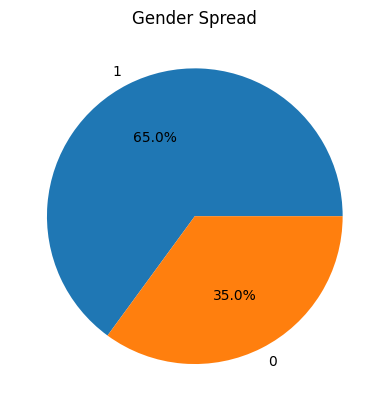

In [79]:

gender_spread = df['gender'].value_counts()
gender_spread.plot.pie(autopct='%1.1f%%')
plt.title("Gender Spread")
plt.ylabel('')
plt.show()

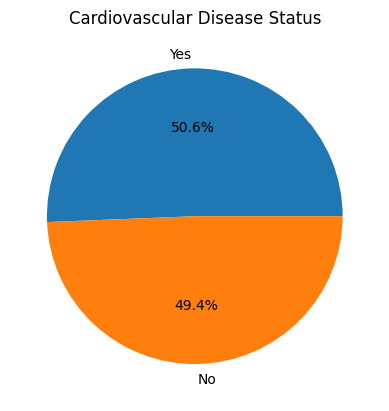

In [80]:
disease_status = df['cardio'].value_counts()
disease_status.plot.pie(autopct='%1.1f%%', labels=['Yes', 'No'])
plt.title("Cardiovascular Disease Status")
plt.ylabel('')
plt.show()

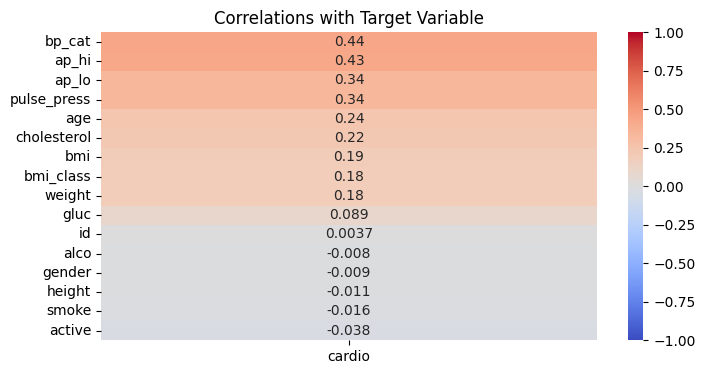

In [81]:
correlation_matrix = df.corr()

#We only take the correlations with 'target'.
target_correlation = correlation_matrix[TARGET].sort_values(ascending=False)
target_correlation = target_correlation.drop("cardio")

plt.figure(figsize=(8, 4))
sns.heatmap(target_correlation.to_frame(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)
plt.title("Correlations with Target Variable")
plt.show()

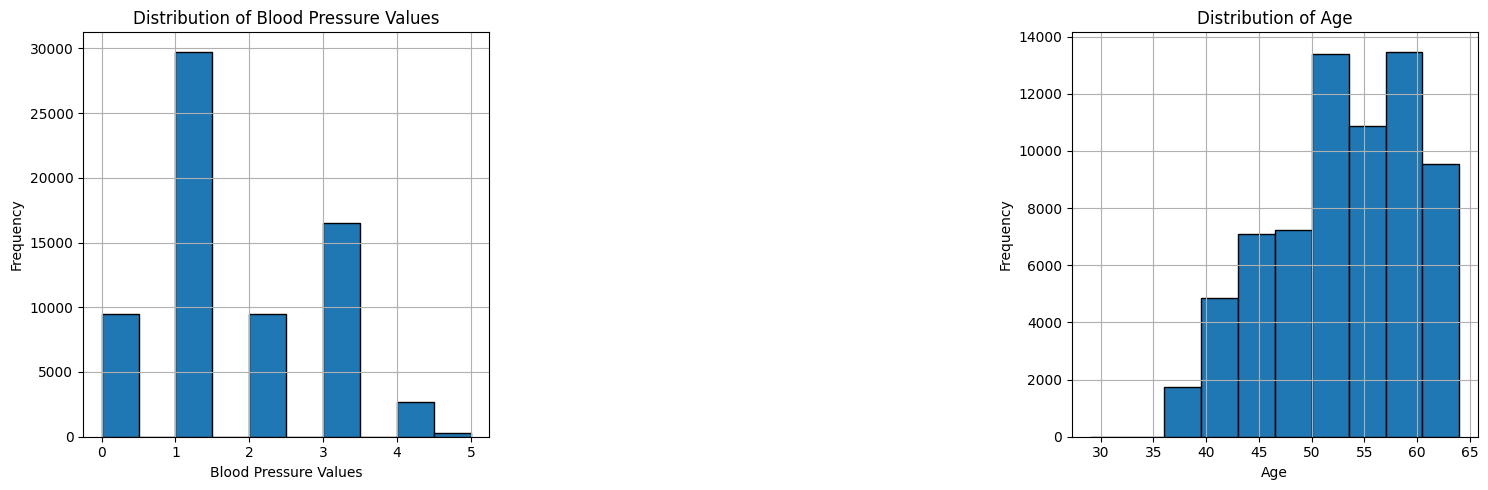

In [82]:
# Creating figure for histogram
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1) #In a 1-row x 3-column space, the first plot.
df['bp_cat'].hist(edgecolor='black')
plt.title('Distribution of Blood Pressure Values')
plt.xlabel('Blood Pressure Values')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
df['age'].hist(edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<a id='section_5'></a>
### Machine Learning Model

In [83]:
y = df[TARGET]
X = df.drop(columns=['id', TARGET], axis = 1)

In [ ]:
# !pip install pycaret

In [ ]:
# pip install --upgrade pandas

In [ ]:
# pip install --upgrade dask-cudf

In [84]:
# Assuming df is your dataframe
df.to_csv('my_data.csv', index=False)

In [2]:
# # Accessing output file
# import pandas as pd

# Load the data
# df = pd.read_csv('/kaggle/working/my_data.csv')
df = pd.read_csv('my_data.csv')

In [3]:
TARGET = 'cardio'
y = df[TARGET]
X = df.drop(columns=['id', TARGET], axis = 1)

In [4]:
df.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio    bmi  bmi_class  bp_cat  pulse_press
0   0   50       0     168      62    110     80            1     1      0     0       1       0 21.967          2       1           30
1   1   55       1     156      85    140     90            3     1      0     0       1       1 34.928          4       3           50
2   2   51       1     165      64    130     70            3     1      0     0       0       1 23.508          2       2           60
3   3   48       0     169      82    150    100            1     1      0     0       1       1 28.710          3       3           50
4   4   47       1     156      56    100     60            1     1      0     0       0       0 23.011          2       0           40

In [26]:
# X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [86]:
from pycaret.classification import *
s = setup(df, target = 'cardio', train_size = 0.8, ignore_features = 'id', fold = 3)

In [27]:
best = compare_models()

NameError: name 'compare_models' is not defined

* As seen above, with pycaret, we've seen which model objects might be successful for this project. Despite very minor differences in success rates, LightGBM works much faster, so we will use light gbm here.

In [ ]:
# !pip install lightgbm

In [ ]:
# lgbm_model = LGBMClassifier()

In [ ]:
# lgbm_model.get_params()

In [ ]:
# lgbm_model_= cross_validate(lgbm_model, X, y, cv = 10, scoring = ["accuracy", "f1", "roc_auc"])

In [ ]:
# lgbm_model_["test_accuracy"].mean()

In [ ]:
# lgbm_model_["test_f1"].mean()

In [ ]:
# lgbm_model_["test_roc_auc"].mean()

     As can be seen, the success metrics of the base model established with LightGBM can be said to be quite good. Now, to achieve a slight increase in model performance, we will perform hyperparameter optimization.

<a id='section_6'></a>
### Hyperparameter Optimization with Grid Search CV

In [ ]:
# params = {'colsample_bytree': [0.55,0.65,0.70,1],
#          'min_child_samples':[12,15,20],
#          'max_depth':[-1,3,7],
# #          'learning_rate':[0.1,0.5,1]}

In [ ]:
# lgbm_best = GridSearchCV(lgbm_model,
#                              params,
#                              cv = 5,
#                              n_jobs = -1,
#                              verbose = True).fit(X, y)

In [ ]:
# lgbm_best.best_score_

In [ ]:
# lgbm_best.best_params_

<a id='section_7'></a>
### Final Model

In [ ]:
# final_model = lgbm_model.set_params(**lgbm_best.best_params_).fit(X, y)

In [ ]:
# cv_results_last = cross_validate(final_model,
#                            X,
#                            y,
#                            cv = 5,
#                            scoring = ["accuracy", "f1", "roc_auc"])

In [ ]:
# cv_results_last['test_accuracy'].mean()

In [ ]:
# cv_results_last['test_f1'].mean()

In [ ]:
# cv_results_last['test_roc_auc'].mean()

In [ ]:
# accuracy = cv_results_last['test_accuracy'].mean()
# f1_score = cv_results_last['test_f1'].mean()
# roc_auc = cv_results_last['test_roc_auc'].mean()


# data = {
#     'Metric': ['Accuracy', 'F1', 'ROC AUC'],
#     'Value': [accuracy, f1_score, roc_auc]
# }
# dfii = pd.DataFrame(data)

# plt.figure(figsize=(8, 5))
# ax = sns.barplot(x='Metric', y='Value', data=dfii, palette="viridis")

# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'),
#                 (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha = 'center', va = 'center',
#                 xytext = (0, 10),
#                 textcoords = 'offset points')

# plt.ylim(0, 1.1)

If we want to observe which variable the model learned more from during training:

In [ ]:
# import lightgbm as lgb
# lgb.plot_importance(final_model, importance_type='split', max_num_features=6, figsize=(10, 6))
# plt.title("Features Used to Train Model.")
# plt.show()

 Let's randomly select an observation unit from our dataset and have our model make a prediction.

In [ ]:
# random_user = X.sample(1)
# final_model.predict(random_user)

Our prediction model is ready. If we want to use our model on different computers after this stage, we can save our model as a file using joblib.
#### Thanks to machine learning, we have gained a different perspective on preventive medicine in the medical sector. If you have any questions, comments, or feedback, please feel free to share and **do not forget to take care your heart and yourself**

<center><img src="https://media.giphy.com/media/j2xsmlsdig4PWE7GgA/giphy.gif" width="500"/></center>

In [ ]:
## Update

In [ ]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
# from sklearn.metrics import accuracy_score

# X = df.drop('cardio', axis=1)  # Replace 'target_column' with the actual name of your target variable
# y = df['cardio']

# # Split the dataset into training and testing sets
# from sklearn.model_selection import train_test_split

# # Load your dataset and split it into features (X) and target variable (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define your base models
# model1 = RandomForestClassifier(n_estimators=100, random_state=42)
# model2 = LogisticRegression(random_state=42)
# model3 = SVC(probability=True, random_state=42)
# model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Replace LGBM with Gradient Boosting

# # Create an ensemble of models using a more advanced technique like stacking
# # Stacking combines the predictions of multiple base estimators to improve accuracy
# ensemble_model = VotingClassifier(estimators=[
#     ('rf', model1),
#     ('lr', model2),
#     ('svc', model3),
#     ('gb', model4)  # Add Gradient Boosting
# ], voting='soft')  # 'soft' enables probability voting for SVC

# # Cross-validate the ensemble model
# cv_results = cross_validate(ensemble_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
# print("Cross-validated results:")
# print("Accuracy:", cv_results['test_accuracy'].mean())
# print("F1-score:", cv_results['test_f1'].mean())
# print("ROC AUC:", cv_results['test_roc_auc'].mean())

# # Hyperparameter optimization using GridSearchCV
# params = {
#     'rf__n_estimators': [50, 100, 150],
#     'svc__C': [1, 10, 100],
#     'gb__n_estimators': [50, 100, 150],
#     'gb__learning_rate': [0.01, 0.1, 0.2]
# }

# grid_search = GridSearchCV(estimator=ensemble_model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
# grid_search.fit(X, y)

# # Display best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)

# # Fit the ensemble model on the entire dataset with the best parameters
# best_ensemble_model = grid_search.best_estimator_
# best_ensemble_model.fit(X, y)

# # Evaluate the best ensemble model on the entire dataset
# best_ensemble_predictions = best_ensemble_model.predict(X_test)

# # Accuracy
# best_accuracy = accuracy_score(y_test, best_ensemble_predictions)
# print(f"Best Ensemble Model Accuracy: {best_accuracy}")

# # Precision, Recall, and F1-score
# from sklearn.metrics import precision_score, recall_score, f1_score

# precision = precision_score(y_test, best_ensemble_predictions)
# recall = recall_score(y_test, best_ensemble_predictions)
# f1 = f1_score(y_test, best_ensemble_predictions)

# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1-score: {f1}")


In [ ]:
# # Import necessary libraries
# from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load your dataset and split it into features (X) and target variable (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define your base models
# model1 = RandomForestClassifier(n_estimators=100, random_state=42)
# model2 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
# model3 = XGBClassifier(random_state=42)
# model4 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# # Define the stacking ensemble
# stacking_ensemble = StackingClassifier(
#     estimators=[('rf', model1), ('bagging', model2), ('xgb', model3), ('mlp', model4)],
#     final_estimator=LogisticRegression(),  # You can choose another final estimator based on your needs
#     stack_method='auto',
# )

# # Fit the stacking ensemble on your training data
# stacking_ensemble.fit(X_train, y_train)

# # Make predictions on the test set
# predictions = stacking_ensemble.predict(X_test)

# # Evaluate the accuracy of the stacking ensemble
# accuracy = accuracy_score(y_test, predictions)
# print(f"Accuracy of the stacking ensemble: {accuracy}")

In [ ]:
# # Import necessary libraries
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import accuracy_score

# X = df.drop('cardio', axis=1)  # Replace 'target_column' with the actual name of your target variable
# y = df['cardio']

# # Split the dataset into training and testing sets
# from sklearn.model_selection import train_test_split

# # Load your dataset and split it into features (X) and target variable (y)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define your base models
# model1 = RandomForestClassifier(n_estimators=100, random_state=42)
# model2 = LogisticRegression(random_state=42)
# model3 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# # Bagging: Train each model independently
# preds_model1 = cross_val_predict(model1, X, y, cv=5)
# preds_model2 = cross_val_predict(model2, X, y, cv=5)
# preds_model3 = cross_val_predict(model3, X, y, cv=5)

# # Stacking: Combine predictions of base models using a meta-model (neural network in this case)
# stacking_X = np.column_stack((preds_model1, preds_model2, preds_model3))
# stacking_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
# stacking_model.fit(stacking_X, y)

# # Make predictions on the test set
# test_preds_model1 = model1.predict(X_test)
# test_preds_model2 = model2.predict(X_test)
# test_preds_model3 = model3.predict(X_test)

# test_stacking_X = np.column_stack((test_preds_model1, test_preds_model2, test_preds_model3))
# final_predictions = stacking_model.predict(test_stacking_X)

# # Evaluate the accuracy of the custom ensemble
# accuracy = accuracy_score(y_test, final_predictions)
# print(f"Accuracy of the custom ensemble: {accuracy}")

In [89]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [90]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Load your dataset and split it into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Define base models for bagging
base_model1 = DecisionTreeClassifier()
base_model2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

In [92]:
# Create a Bagging ensemble
bagging_ensemble = BaggingClassifier(base_model1, n_estimators=10, random_state=42)

In [93]:
# Define the stacking ensemble with a neural network as the final estimator
stacking_ensemble = StackingClassifier(
    estimators=[('bagging', bagging_ensemble), ('mlp', base_model2)],
    final_estimator=MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    stack_method='auto',
)

In [94]:
# Cross-validate the stacking ensemble
cv_results = cross_validate(stacking_ensemble, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

Cross-validated results:
Accuracy: 0.6762002492120501
F1-score: 0.6343565131449675
ROC AUC: 0.7411722032146756


In [95]:
# Train the stacking ensemble on the entire dataset
stacking_ensemble.fit(X, y)

StackingClassifier(cv=None,
                   estimators=[('bagging',
                                BaggingClassifier(base_estimator='deprecated',
                                                  bootstrap=True,
                                                  bootstrap_features=False,
                                                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                   class_weight=None,
                                                                                   criterion='gini',
                                                                                   max_depth=None,
                                                                                   max_features=None,
                                                                                   max_leaf_nodes=None,
                                                                                   min_impurity_decrease=0.0,
                                                                                   min_samples_leaf=1,
                                                                                   min_samples_split=2,
                                                                                   min_weight_fra...
                                                 epsilon=1e-08,
                                                 hidden_layer_sizes=(100,),
                                                 learning_rate='constant',
                                                 learning_rate_init=0.001,
                                                 max_fun=15000, max_iter=500,
                                                 momentum=0.9,
                                                 n_iter_no_change=10,
                                                 nesterovs_momentum=True,
                                                 power_t=0.5, random_state=42,
                                                 shuffle=True, solver='adam',
                                                 tol=0.0001,
                                                 validation_fraction=0.1,
                                                 verbose=False,
                                                 warm_start=False),
                   n_jobs=None, passthrough=False, stack_method='auto',
                   verbose=0)

In [96]:
# Make predictions on the test set
predictions = stacking_ensemble.predict(X_test)

# Evaluate the accuracy of the stacking ensemble with a neural network
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the stacking ensemble with a neural network: {accuracy}")

Accuracy of the stacking ensemble with a neural network: 0.7442644579637909


### Another Model 2

In [66]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score

In [67]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Load your dataset and split it into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your base models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = SVC(probability=True, random_state=42)
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Replace LGBM with Gradient Boosting

In [68]:
# Create an ensemble of models using a more advanced technique like stacking
# Stacking combines the predictions of multiple base estimators to improve accuracy
ensemble_model = VotingClassifier(estimators=[
    ('rf', model1),
    ('lr', model2),
    ('svc', model3),
    ('gb', model4)  # Add Gradient Boosting
], voting='soft')  # 'soft' enables probability voting for SVC

In [ ]:
# Cross-validate the ensemble model
cv_results = cross_validate(ensemble_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

# Hyperparameter optimization using GridSearchCV
params = {
    'rf__n_estimators': [50, 100, 150],
    'svc__C': [1, 10, 100],
    'gb__n_estimators': [50, 100, 150],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=ensemble_model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X, y)

In [ ]:
# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Fit the ensemble model on the entire dataset with the best parameters
best_ensemble_model = grid_search.best_estimator_
best_ensemble_model.fit(X, y)

# Evaluate the best ensemble model on the entire dataset
best_ensemble_predictions = best_ensemble_model.predict(X_test)

In [ ]:
# Accuracy
best_accuracy = accuracy_score(y_test, best_ensemble_predictions)
print(f"Best Ensemble Model Accuracy: {best_accuracy}")

# Precision, Recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, best_ensemble_predictions)
recall = recall_score(y_test, best_ensemble_predictions)
f1 = f1_score(y_test, best_ensemble_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

### Another model 15/11/2023

In [71]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your base models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
model3 = XGBClassifier(random_state=42)
model4 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

In [72]:
# Define the stacking ensemble
stacking_ensemble = StackingClassifier(
    estimators=[('rf', model1), ('bagging', model2), ('xgb', model3), ('mlp', model4)],
    final_estimator=LogisticRegression(),  # You can choose another final estimator based on your needs
    stack_method='auto',
)

In [73]:
# Fit the stacking ensemble on your training data
stacking_ensemble.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('bagging',
                                BaggingClassifier(base_estimator=RandomForestClassifier(),
                                                  random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categor...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('mlp',
                                MLPClassifier(max_iter=500, random_state=42))],
                   final_estimator=LogisticRegression())

In [74]:
# Make predictions on the test set
predictions = stacking_ensemble.predict(X_test)

# Evaluate the accuracy of the stacking ensemble
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the stacking ensemble: {accuracy}")

Accuracy of the stacking ensemble: 0.7384006450194239


In [75]:
# Cross-validate the stacking ensemble
cv_results = cross_validate(stacking_ensemble, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

Cross-validated results:
Accuracy: 0.7300447115737008
F1-score: 0.7277584411222517
ROC AUC: 0.7994710177541806


### Another model _ 15-11-2023 Update

In [85]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Load your dataset and split it into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Define your base models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = SVC(probability=True, random_state=42)
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)  # Replace LGBM with Gradient Boosting

# Create an ensemble of models using a more advanced technique like stacking
# Stacking combines the predictions of multiple base estimators to improve accuracy
ensemble_model = VotingClassifier(estimators=[
    ('rf', model1),
    ('lr', model2),
    ('svc', model3),
    ('gb', model4)  # Add Gradient Boosting
], voting='soft')  # 'soft' enables probability voting for SVC

In [87]:
# Cross-validate the ensemble model
cv_results = cross_validate(ensemble_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

Cross-validated results:
Accuracy: 0.7313054313567398
F1-score: 0.7151833502031806
ROC AUC: 0.7958946213872945


In [89]:
# Hyperparameter optimization using GridSearchCV
params = {
    'rf__n_estimators': [50, 100, 150],
    'svc__C': [1, 10, 100],
    'gb__n_estimators': [50, 100, 150],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}


In [ ]:
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

In [ ]:
# Fit the ensemble model on the entire dataset with the best parameters
best_ensemble_model = grid_search.best_estimator_
best_ensemble_model.fit(X, y)

In [ ]:
# Evaluate the best ensemble model on the entire dataset
best_ensemble_predictions = best_ensemble_model.predict(X_test)

# Accuracy
best_accuracy = accuracy_score(y_test, best_ensemble_predictions)
print(f"Best Ensemble Model Accuracy: {best_accuracy}")

In [ ]:
# Precision, Recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, best_ensemble_predictions)
recall = recall_score(y_test, best_ensemble_predictions)
f1 = f1_score(y_test, best_ensemble_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

In [88]:
### Another Update 17-11-2023

In [ ]:
""" Hybrid Model Paper Feedback and they model info, "Prepare a code, considering the following " SVM, RF, KNN, DT, XGB and LR", and now ,with  stacking (we used SVM,DT,RF with hypertune as a base classifier
and XGB classifier as a meta classifier. Out of base classifier
test on meta classifier to identify disease), and then voting, bagging-xgboost, prepare a model; in simple "learning-based ensemble stacked model (XGB [17],
SVM, DT, and hypertuning of RF) as well as a voting model
(SVM, DT, and hypertuning of RF). For our experiment, we
used six machine learning techniques: RF, KNN, DT, XGB,
SVM, and LR " , now give code """

#### Bagging XGBoost, based on previous work

In [5]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Define base models
svm_model = SVC(probability=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(random_state=42)

# Define stacking classifier
stacking_models = [
    ('svm', svm_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
]

stacking_classifier = StackingClassifier(estimators=stacking_models, final_estimator=XGBClassifier(random_state=42))

In [ ]:
# Cross-validate the stacking classifier
cv_results_stacking = cross_validate(stacking_classifier, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results for Stacking Classifier:")
print("Accuracy:", cv_results_stacking['test_accuracy'].mean())
print("F1-score:", cv_results_stacking['test_f1'].mean())
print("ROC AUC:", cv_results_stacking['test_roc_auc'].mean())

In [ ]:
# Define voting classifier
voting_models = [
    ('svm', svm_model),
    ('dt', dt_model),
    ('rf', rf_model)
]

voting_classifier = VotingClassifier(estimators=voting_models, voting='soft')

# Cross-validate the voting classifier
cv_results_voting = cross_validate(voting_classifier, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("\nCross-validated results for Voting Classifier:")
print("Accuracy:", cv_results_voting['test_accuracy'].mean())
print("F1-score:", cv_results_voting['test_f1'].mean())
print("ROC AUC:", cv_results_voting['test_roc_auc'].mean())

In [ ]:
# Hyperparameter optimization using GridSearchCV for Bagging-XGBoost
params = {
    'n_estimators': [5, 10, 15],
    'base_estimator__learning_rate': [0.01, 0.1, 0.2]
}

bagging_xgb_model = BaggingClassifier(base_estimator=XGBClassifier(random_state=42), random_state=42)
grid_search_bagging_xgb = GridSearchCV(estimator=bagging_xgb_model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [ ]:
grid_search_bagging_xgb.fit(X_train, y_train)

In [ ]:
# Display best parameters and best score for Bagging-XGBoost
print("\nBest Parameters for Bagging-XGBoost:", grid_search_bagging_xgb.best_params_)
print("Best Accuracy for Bagging-XGBoost:", grid_search_bagging_xgb.best_score_)

In [ ]:
# Fit the Bagging-XGBoost model on the entire dataset with the best parameters
best_bagging_xgb_model = grid_search_bagging_xgb.best_estimator_
best_bagging_xgb_model.fit(X_train, y_train)

In [ ]:
# Evaluate the Bagging-XGBoost model on the test set
bagging_xgb_predictions = best_bagging_xgb_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for Bagging-XGBoost
accuracy_bagging_xgb = accuracy_score(y_test, bagging_xgb_predictions)
precision_bagging_xgb = precision_score(y_test, bagging_xgb_predictions)
recall_bagging_xgb = recall_score(y_test, bagging_xgb_predictions)
f1_bagging_xgb = f1_score(y_test, bagging_xgb_predictions)

print("\nBagging-XGBoost Model Accuracy:", accuracy_bagging_xgb)
print("Precision:", precision_bagging_xgb)
print("Recall:", recall_bagging_xgb)
print("F1-score:", f1_bagging_xgb)

In [ ]:
# Gap

In [5]:
# ... (previous code)

# Hyperparameter optimization using GridSearchCV for Stacking Classifier
params_stacking = {
    'final_estimator__n_estimators': [50, 100, 150],
    'final_estimator__learning_rate': [0.01, 0.1, 0.2]
}

grid_search_stacking = GridSearchCV(estimator=stacking_classifier, param_grid=params_stacking, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_stacking.fit(X_train, y_train)

# Display best parameters and best score for Stacking Classifier
print("\nBest Parameters for Stacking Classifier:", grid_search_stacking.best_params_)
print("Best Accuracy for Stacking Classifier:", grid_search_stacking.best_score_)

# Fit the Stacking Classifier model on the entire dataset with the best parameters
best_stacking_classifier = grid_search_stacking.best_estimator_
best_stacking_classifier.fit(X_train, y_train)

# Evaluate the Stacking Classifier model on the test set
stacking_predictions = best_stacking_classifier.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for Stacking Classifier
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)

print("\nStacking Classifier Model Accuracy:", accuracy_stacking)
print("Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1-score:", f1_stacking)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Stacking Classifier: {'final_estimator__learning_rate': 0.1, 'final_estimator__n_estimators': 50}
Best Accuracy for Stacking Classifier: 0.8987499999999999

Stacking Classifier Model Accuracy: 0.885
Precision: 0.9285714285714286
Recall: 0.8504672897196262
F1-score: 0.8878048780487805


In [6]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, VotingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
svm_model = SVC(probability=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(random_state=42)

# Define stacking classifier
stacking_models = [
    ('svm', svm_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('knn', knn_model),
    ('lr', lr_model)
]

# Define hyperparameter grid for stacking classifier
params_stacking = {
    'final_estimator__n_estimators': [50, 100, 150],
    'final_estimator__learning_rate': [0.01, 0.1, 0.2]
}

# Create stacking classifier
stacking_classifier = StackingClassifier(estimators=stacking_models, final_estimator=XGBClassifier(random_state=42))

# Hyperparameter optimization using GridSearchCV for Stacking Classifier
grid_search_stacking = GridSearchCV(estimator=stacking_classifier, param_grid=params_stacking, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_stacking.fit(X_train, y_train)

# Display best parameters and best score for Stacking Classifier
print("\nBest Parameters for Stacking Classifier:", grid_search_stacking.best_params_)
print("Best Accuracy for Stacking Classifier:", grid_search_stacking.best_score_)

# Fit the Stacking Classifier model on the entire dataset with the best parameters
best_stacking_classifier = grid_search_stacking.best_estimator_
best_stacking_classifier.fit(X_train, y_train)

# Evaluate the Stacking Classifier model on the test set
stacking_predictions = best_stacking_classifier.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for Stacking Classifier
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)

print("\nStacking Classifier Model Accuracy:", accuracy_stacking)
print("Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1-score:", f1_stacking)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Stacking Classifier: {'final_estimator__learning_rate': 0.01, 'final_estimator__n_estimators': 150}
Best Accuracy for Stacking Classifier: 0.9037500000000002

Stacking Classifier Model Accuracy: 0.885
Precision: 0.9285714285714286
Recall: 0.8504672897196262
F1-score: 0.8878048780487805


In [7]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
svm_model = SVC(probability=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(random_state=42)

# Define stacking classifier
stacking_models = [
    ('svm', svm_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('knn', knn_model),
    ('lr', lr_model)
]

# Define hyperparameter grid for stacking classifier
params_stacking = {
    'final_estimator__n_estimators': [50, 100, 150],
    'final_estimator__learning_rate': [0.01, 0.1, 0.2]
}

# Create stacking classifier
stacking_classifier = StackingClassifier(estimators=stacking_models, final_estimator=XGBClassifier(random_state=42))

# Hyperparameter optimization using GridSearchCV for Stacking Classifier
grid_search_stacking = GridSearchCV(estimator=stacking_classifier, param_grid=params_stacking, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_stacking.fit(X_train, y_train)

# Display best parameters and best score for Stacking Classifier
print("\nBest Parameters for Stacking Classifier:", grid_search_stacking.best_params_)
print("Best F1-score for Stacking Classifier:", grid_search_stacking.best_score_)

# Fit the Stacking Classifier model on the entire dataset with the best parameters
best_stacking_classifier = grid_search_stacking.best_estimator_
best_stacking_classifier.fit(X_train, y_train)

# Evaluate the Stacking Classifier model on the test set
stacking_predictions = best_stacking_classifier.predict(X_test)

# Precision, Recall, and F1-score for Stacking Classifier
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)

print("\nStacking Classifier Model Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1-score:", f1_stacking)


Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Stacking Classifier: {'final_estimator__learning_rate': 0.01, 'final_estimator__n_estimators': 150}
Best F1-score for Stacking Classifier: 0.8997458269976815

Stacking Classifier Model Precision: 0.9285714285714286
Recall: 0.8504672897196262
F1-score: 0.8878048780487805


In [8]:
# Import necessary libraries
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
svm_model = SVC(probability=True, random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(random_state=42)

# Define stacking classifier
stacking_models = [
    ('svm', svm_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('knn', knn_model),
    ('lr', lr_model)
]

# Define hyperparameter grid for RandomForestClassifier
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameter optimization using GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=params_rf, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_rf.fit(X_train, y_train)

# Display best parameters and best score for RandomForestClassifier
print("\nBest Parameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best F1-score for RandomForestClassifier:", grid_search_rf.best_score_)

# Create stacking classifier
stacking_classifier = StackingClassifier(estimators=stacking_models, final_estimator=XGBClassifier(random_state=42))

# Fit the Stacking Classifier model on the entire dataset with the best parameters
best_stacking_classifier = stacking_classifier.fit(X_train, y_train)

# Evaluate the Stacking Classifier model on the test set
stacking_predictions = best_stacking_classifier.predict(X_test)

# Precision, Recall, and F1-score for Stacking Classifier
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)

print("\nStacking Classifier Model Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1-score:", f1_stacking)


Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best F1-score for RandomForestClassifier: 0.8958485200033681

Stacking Classifier Model Precision: 0.9375
Recall: 0.8411214953271028
F1-score: 0.8866995073891626


In [9]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Define hyperparameter grids for base models
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

params_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Hyperparameter optimization using GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=params_rf, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_rf.fit(X_train, y_train)

# Hyperparameter optimization using GridSearchCV for GradientBoostingClassifier
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=params_gb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_gb.fit(X_train, y_train)

# Hyperparameter optimization using GridSearchCV for XGBClassifier
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=params_xgb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_xgb.fit(X_train, y_train)

# Display best parameters and best score for base models
print("\nBest Parameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best F1-score for RandomForestClassifier:", grid_search_rf.best_score_)

print("\nBest Parameters for GradientBoostingClassifier:", grid_search_gb.best_params_)
print("Best F1-score for GradientBoostingClassifier:", grid_search_gb.best_score_)

print("\nBest Parameters for XGBClassifier:", grid_search_xgb.best_params_)
print("Best F1-score for XGBClassifier:", grid_search_xgb.best_score_)

# Define hyperparameter grid for Bagging-XGBoost
params_bagging_xgb = {
    'n_estimators': [5, 10, 15],
    'base_estimator__learning_rate': [0.01, 0.1, 0.2]
}

# Hyperparameter optimization using GridSearchCV for Bagging-XGBoost
bagging_xgb_model = BaggingClassifier(base_estimator=XGBClassifier(random_state=42), random_state=42)
grid_search_bagging_xgb = GridSearchCV(estimator=bagging_xgb_model, param_grid=params_bagging_xgb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_bagging_xgb.fit(X_train, y_train)

# Display best parameters and best score for Bagging-XGBoost
print("\nBest Parameters for Bagging-XGBoost:", grid_search_bagging_xgb.best_params_)
print("Best Accuracy for Bagging-XGBoost:", grid_search_bagging_xgb.best_score_)

# Fit the Bagging-XGBoost model on the entire dataset with the best parameters
best_bagging_xgb_model = grid_search_bagging_xgb.best_estimator_
best_bagging_xgb_model.fit(X_train, y_train)

# Evaluate the Bagging-XGBoost model on the test set
bagging_xgb_predictions = best_bagging_xgb_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for Bagging-XGBoost
accuracy_bagging_xgb = accuracy_score(y_test, bagging_xgb_predictions)
precision_bagging_xgb = precision_score(y_test, bagging_xgb_predictions)
recall_bagging_xgb = recall_score(y_test, bagging_xgb_predictions)
f1_bagging_xgb = f1_score(y_test, bagging_xgb_predictions)

print("\nBagging-XGBoost Model Accuracy:", accuracy_bagging_xgb)
print("Precision:", precision_bagging_xgb)
print("Recall:", recall_bagging_xgb)
print("F1-score:", f1_bagging_xgb)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best F1-score for RandomForestClassifier: 0.8958485200033681

Best Parameters for GradientBoostingClassifier: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Best F1-score for GradientBoostingClassifier: 0.9052701783040698

Best Parameters for XGBClassifier: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best F1-score for XGBClassifier: 0.9123334889164788
Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Bagging-XGBoost: {'base_estimator__learning_rate': 0.2, 'n_estimators': 5}
Best Accuracy for Bagging-XGBoost: 0.915

Bagging-XGBoost Model Accuracy: 0.905
Precision: 0.9680851063829787
Recall: 0.8504672897196262
F1-sco

In [12]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgb_model = LGBMClassifier(random_state=42)

# Define hyperparameter grids for base models
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

params_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

params_lgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Hyperparameter optimization using GridSearchCV for base models
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=params_rf, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_rf.fit(X_train, y_train)

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=params_gb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_gb.fit(X_train, y_train)

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=params_xgb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_xgb.fit(X_train, y_train)

grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=params_lgb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_lgb.fit(X_train, y_train)

# Define hyperparameter grid for StackingClassifier
stacking_model = StackingClassifier(estimators=[
    ('rf', grid_search_rf.best_estimator_),
    ('gb', grid_search_gb.best_estimator_),
    ('xgb', grid_search_xgb.best_estimator_),
    ('lgb', grid_search_lgb.best_estimator_)
], final_estimator=XGBClassifier(random_state=42))

# Fit the StackingClassifier model on the entire dataset
stacking_model.fit(X_train, y_train)

# Evaluate the StackingClassifier model on the test set
stacking_predictions = stacking_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for StackingClassifier
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)

print("\nStacking Model Accuracy:", accuracy_stacking)
print("Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1-score:", f1_stacking)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[Li

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 314, number of negative: 326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4275
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490625 -> initscore=-0.037504
[LightGBM] [Info] Start training from score -0.037504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [11]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification
import numpy as np

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgb_model = LGBMClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Model: Stacking Classifier with Transformers
stacking_model = make_pipeline(
    StackingClassifier(estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('svm', svm_model),
    ], final_estimator=svm_model)
)

# Model: Voting Classifier with Transformers
voting_model = make_pipeline(
    VotingClassifier(estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('svm', svm_model),
    ], voting='soft')
)

# Model: Bagging-XGBoost
params_bagging_xgb = {
    'n_estimators': [5, 10, 15],
    'base_estimator__learning_rate': [0.01, 0.1, 0.2]
}

bagging_xgb_model = BaggingClassifier(base_estimator=XGBClassifier(random_state=42), random_state=42)
grid_search_bagging_xgb = GridSearchCV(estimator=bagging_xgb_model, param_grid=params_bagging_xgb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_bagging_xgb.fit(X_train, y_train)

# Display best parameters and best score for Bagging-XGBoost
print("\nBest Parameters for Bagging-XGBoost:", grid_search_bagging_xgb.best_params_)
print("Best Accuracy for Bagging-XGBoost:", grid_search_bagging_xgb.best_score_)

# Fit the Bagging-XGBoost model on the entire dataset with the best parameters
best_bagging_xgb_model = grid_search_bagging_xgb.best_estimator_
best_bagging_xgb_model.fit(X_train, y_train)

# Evaluate the Bagging-XGBoost model on the test set
bagging_xgb_predictions = best_bagging_xgb_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for Bagging-XGBoost
accuracy_bagging_xgb = accuracy_score(y_test, bagging_xgb_predictions)
precision_bagging_xgb = precision_score(y_test, bagging_xgb_predictions)
recall_bagging_xgb = recall_score(y_test, bagging_xgb_predictions)
f1_bagging_xgb = f1_score(y_test, bagging_xgb_predictions)

print("\nBagging-XGBoost Model Accuracy:", accuracy_bagging_xgb)
print("Precision:", precision_bagging_xgb)
print("Recall:", recall_bagging_xgb)
print("F1-score:", f1_bagging_xgb)

# Evaluate models using cross-validation
accuracy_stacking = np.mean(cross_val_score(stacking_model, X, y, cv=5, scoring='accuracy'))
accuracy_voting = np.mean(cross_val_score(voting_model, X, y, cv=5, scoring='accuracy'))

# Display results
print("\nStacking Model Accuracy:", accuracy_stacking)
print("Voting Model Accuracy:", accuracy_voting)


Fitting 5 folds for each of 9 candidates, totalling 45 fits

Best Parameters for Bagging-XGBoost: {'base_estimator__learning_rate': 0.2, 'n_estimators': 5}
Best Accuracy for Bagging-XGBoost: 0.915

Bagging-XGBoost Model Accuracy: 0.905
Precision: 0.9680851063829787
Recall: 0.8504672897196262
F1-score: 0.9054726368159204
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 320, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4274
[Lig

[LightGBM] [Info] Number of positive: 320, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4270
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 320, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4276
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 320, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4275
[LightGBM] [Info] Number of data points in the train set: 640, number of used f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [13]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
lgb_model = LGBMClassifier(random_state=42)

# Define hyperparameter grids for base models
params_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

params_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

params_lgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Hyperparameter optimization using GridSearchCV for base models
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=params_rf, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_rf.fit(X_train, y_train)

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=params_gb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_gb.fit(X_train, y_train)

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=params_xgb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_xgb.fit(X_train, y_train)

grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=params_lgb, cv=5, n_jobs=-1, verbose=1, scoring='f1')
grid_search_lgb.fit(X_train, y_train)

# Define base models for stacking
base_models = [
    ('rf', grid_search_rf.best_estimator_),
    ('gb', grid_search_gb.best_estimator_),
    ('xgb', grid_search_xgb.best_estimator_),
    ('lgb', grid_search_lgb.best_estimator_)
]

# Define meta-classifier (XGBoost)
meta_classifier = XGBClassifier(random_state=42)

# Create StackingClassifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_classifier)

# Fit the StackingClassifier model on the entire dataset
stacking_model.fit(X_train, y_train)

# Evaluate the StackingClassifier model on the test set
stacking_predictions = stacking_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for StackingClassifier
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)

print("\nStacking Model Accuracy:", accuracy_stacking)
print("Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1-score:", f1_stacking)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[Li

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 314, number of negative: 326
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4275
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490625 -> initscore=-0.037504
[LightGBM] [Info] Start training from score -0.037504
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 315, number of negative: 325
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4270
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492188 -> initscore=-0.031253
[LightGBM] [Info] Start training from score -0.031253
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG


Stacking Model Accuracy: 0.87
Precision: 0.945054945054945
Recall: 0.8037383177570093
F1-score: 0.8686868686868686


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate a sample dataset (replace this with your actual dataset loading)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
xgb_model = XGBClassifier(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
catboost_model = CatBoostClassifier(random_state=42)

# Define meta-classifier (Neural Network)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Create StackingClassifier
stacking_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgbm', lgbm_model),
        ('catboost', catboost_model),
    ],
    final_estimator=mlp_classifier
)

# Fit the StackingClassifier model on the entire dataset
stacking_model.fit(X_train, y_train)

# Evaluate the StackingClassifier model on the test set
stacking_predictions = stacking_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score for StackingClassifier
accuracy_stacking = accuracy_score(y_test, stacking_predictions)
precision_stacking = precision_score(y_test, stacking_predictions)
recall_stacking = recall_score(y_test, stacking_predictions)
f1_stacking = f1_score(y_test, stacking_predictions)

print("\nStacking Model Accuracy:", accuracy_stacking)
print("Precision:", precision_stacking)
print("Recall:", recall_stacking)
print("F1-score:", f1_stacking)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from transformers import AlbertForSequenceClassification, AlbertTokenizer

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ALBERT model and tokenizer
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Generate a sample dataset (replace this with your actual dataset loading)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the training and test sets
X_train_encoded = tokenizer(X_train, padding='max_length', truncation=True, return_tensors='pt')
X_test_encoded = tokenizer(X_test, padding='max_length', truncation=True, return_tensors='pt')

# Create DataLoaders for training and testing sets
train_dataloader = DataLoader(X_train_encoded, batch_size=32)
test_dataloader = DataLoader(X_test_encoded, batch_size=32)

# Move model and data to device
model.to(device)
X_train_encoded.to(device)
X_test_encoded.to(device)

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

# Train the model
for epoch in range(3):
    for batch in train_dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = loss_fn(outputs.logits, labels)
        accuracy = (outputs.logits.argmax(1) == labels).sum().item() / len(labels)

        print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

ModuleNotFoundError: No module named 'torch'

In [ ]:
# Stacking Model

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Generate a sample dataset (replace this with your actual dataset loading)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your base models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = SVC(probability=True, random_state=42)
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define the stacking ensemble
stacking_ensemble = StackingClassifier(
    estimators=[
        ('rf', model1),
        ('lr', model2),
        ('svc', model3),
        ('gb', model4)
    ],
    final_estimator=LogisticRegression(),
    cv=5  # Number of cross-validation folds
)

# Cross-validate the stacking ensemble
cv_results = cross_validate(stacking_ensemble, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

# Hyperparameter optimization using GridSearchCV
params = {
    'final_estimator__C': [0.1, 1, 10],  # Hyperparameters for the final estimator (Logistic Regression)
    'rf__n_estimators': [50, 100, 150],
    'svc__C': [1, 10, 100],
    'gb__n_estimators': [50, 100, 150],
    'gb__learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=stacking_ensemble, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Fit the stacking ensemble on the entire dataset with the best parameters
best_stacking_ensemble = grid_search.best_estimator_
best_stacking_ensemble.fit(X_train, y_train)

# Evaluate the best stacking ensemble model on the test set
best_stacking_predictions = best_stacking_ensemble.predict(X_test)

# Accuracy, Precision, Recall, and F1-score
best_accuracy = accuracy_score(y_test, best_stacking_predictions)
precision = precision_score(y_test, best_stacking_predictions)
recall = recall_score(y_test, best_stacking_predictions)
f1 = f1_score(y_test, best_stacking_predictions)

print(f"Best Stacking Ensemble Model Accuracy: {best_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


In [ ]:
Voting model: 

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Generate a sample dataset (replace this with your actual dataset loading)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your base models
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = SVC(probability=True, random_state=42)
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a voting ensemble
voting_ensemble = VotingClassifier(
    estimators=[
        ('rf', model1),
        ('lr', model2),
        ('svc', model3),
        ('gb', model4)
    ],
    voting='soft'  # 'soft' enables probability voting for SVC
)

# Cross-validate the voting ensemble
cv_results = cross_validate(voting_ensemble, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

# Hyperparameter optimization using GridSearchCV (optional)
params = {
    'voting': ['hard', 'soft']
}
grid_search = GridSearchCV(estimator=voting_ensemble, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and best score (optional)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Fit the voting ensemble on the entire dataset
best_voting_ensemble = grid_search.best_estimator_ if 'voting' in grid_search.best_params_ else voting_ensemble
best_voting_ensemble.fit(X_train, y_train)

# Evaluate the voting ensemble model on the test set
voting_predictions = best_voting_ensemble.predict(X_test)

# Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(y_test, voting_predictions)
precision = precision_score(y_test, voting_predictions)
recall = recall_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions)

print(f"Voting Ensemble Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


In [ ]:
# Bagging XG-Boost Model

In [ ]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Generate a sample dataset (replace this with your actual dataset loading)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Create a BaggingClassifier with XGBoost as the base model
bagging_xgb_model = BaggingClassifier(base_estimator=xgb_model, n_estimators=10, random_state=42)

# Cross-validate the bagging with XGBoost model
cv_results = cross_validate(bagging_xgb_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

# Hyperparameter optimization using GridSearchCV (optional)
params = {
    'n_estimators': [5, 10, 15],
    'base_estimator__learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(estimator=bagging_xgb_model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and best score (optional)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Fit the bagging with XGBoost model on the entire dataset
best_bagging_xgb_model = grid_search.best_estimator_ if 'n_estimators' in grid_search.best_params_ else bagging_xgb_model
best_bagging_xgb_model.fit(X_train, y_train)

# Evaluate the bagging with XGBoost model on the test set
bagging_xgb_predictions = best_bagging_xgb_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(y_test, bagging_xgb_predictions)
precision = precision_score(y_test, bagging_xgb_predictions)
recall = recall_score(y_test, bagging_xgb_predictions)
f1 = f1_score(y_test, bagging_xgb_predictions)

print(f"Bagging with XGBoost Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


In [ ]:
Gradient Boosting Model

In [ ]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification

# Generate a sample dataset (replace this with your actual dataset loading)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Cross-validate the Gradient Boosting model
cv_results = cross_validate(gb_model, X_train, y_train, cv=5, scoring=["accuracy", "f1", "roc_auc"])
print("Cross-validated results:")
print("Accuracy:", cv_results['test_accuracy'].mean())
print("F1-score:", cv_results['test_f1'].mean())
print("ROC AUC:", cv_results['test_roc_auc'].mean())

# Hyperparameter optimization using GridSearchCV (optional)
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=gb_model, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display best parameters and best score (optional)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Fit the Gradient Boosting model on the entire dataset with the best parameters
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train, y_train)

# Evaluate the Gradient Boosting model on the test set
gb_predictions = best_gb_model.predict(X_test)

# Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(y_test, gb_predictions)
precision = precision_score(y_test, gb_predictions)
recall = recall_score(y_test, gb_predictions)
f1 = f1_score(y_test, gb_predictions)

print(f"Gradient Boosting Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


In [ ]:
Hybrid Mix Model